# Summary

An example session's behavioral data and model-derived value estimates. Used in **Fig. 1I**.

---
# Setup


In [1]:
from popy.io_tools import load_behavior
from popy.behavior_data_tools import add_foraging_value, add_RL_values
from popy.plotting_tools import show_target_selection_compact


---
# Load data & model-derived values

In [2]:
behav_all = load_behavior()  # load behavioral data
behav_all

,monkey,session,trial_id,block_id,best_target,target,feedback,switch
0,ka,020622,0,0,2,2.0,1.0,NaN
1,ka,020622,1,0,2,2.0,1.0,0.0
2,ka,020622,2,0,2,2.0,0.0,0.0
3,ka,020622,3,0,2,2.0,1.0,0.0
4,ka,020622,4,0,2,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1566,po,240921,413,9,1,1.0,1.0,0.0
1567,po,240921,414,9,1,1.0,0.0,0.0
1568,po,240921,415,9,1,1.0,0.0,0.0
1569,po,240921,416,9,1,1.0,1.0,0.0


In [3]:
# select data for one monkey and one session (displayed in the paper)
monkey, session = 'ka', '210322'
behav = behav_all[(behav_all['monkey'] == monkey) & (behav_all['session'] == session)].copy()
behav


,monkey,session,trial_id,block_id,best_target,target,feedback,switch
341,ka,210322,0,0,1,2.0,0.0,NaN
342,ka,210322,1,0,1,3.0,0.0,1.0
343,ka,210322,2,0,1,1.0,1.0,1.0
344,ka,210322,3,0,1,1.0,0.0,0.0
345,ka,210322,4,0,1,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...
761,ka,210322,420,9,3,3.0,1.0,0.0
762,ka,210322,421,9,3,3.0,0.0,0.0
763,ka,210322,422,9,3,3.0,0.0,0.0
764,ka,210322,423,9,3,3.0,0.0,0.0


In [4]:
# add model-derived value estimates
behav = add_foraging_value(behav)  # add value function (it is an example to show how to plot some extra variables together with the behavior...)
behav = add_RL_values(behav)  # add value function (it is an example to show how to plot some extra variables together with the behavior...)
behav

,monkey,session,trial_id,block_id,best_target,target,feedback,switch,stay_value,V0,Q_1,Q_2,Q_3
0,ka,210322,0,0,1,2.0,0.0,NaN,0.118275,0.118275,0.333333,0.333333,0.333333
1,ka,210322,1,0,1,3.0,0.0,1.0,0.069825,0.118275,0.126673,0.000000,0.126673
2,ka,210322,2,0,1,1.0,1.0,1.0,0.069825,0.118275,0.237301,0.126673,0.110627
3,ka,210322,3,0,1,1.0,0.0,0.0,0.479459,0.118275,0.333915,0.110627,0.096614
4,ka,210322,4,0,1,3.0,0.0,1.0,0.283056,0.118275,0.291616,0.223287,0.211049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,ka,210322,420,9,3,3.0,1.0,0.0,0.813273,0.118275,0.308291,0.308382,0.692336
421,ka,210322,421,9,3,3.0,0.0,0.0,0.889763,0.118275,0.269238,0.269318,0.731309
422,ka,210322,422,9,3,3.0,0.0,0.0,0.525286,0.118275,0.361807,0.361876,0.638671
423,ka,210322,423,9,3,3.0,0.0,0.0,0.310111,0.118275,0.442649,0.442710,0.557768


---
# Create figures

## Fig. 1I, Example blocks (animal's choices & model-derived values)

In the paper, we show **block id: 1** and **block id: 3** as examples.

Blocks are continuous, dashed vertical line marks the last five trials (i.e., payoff probabilities switch gradually).

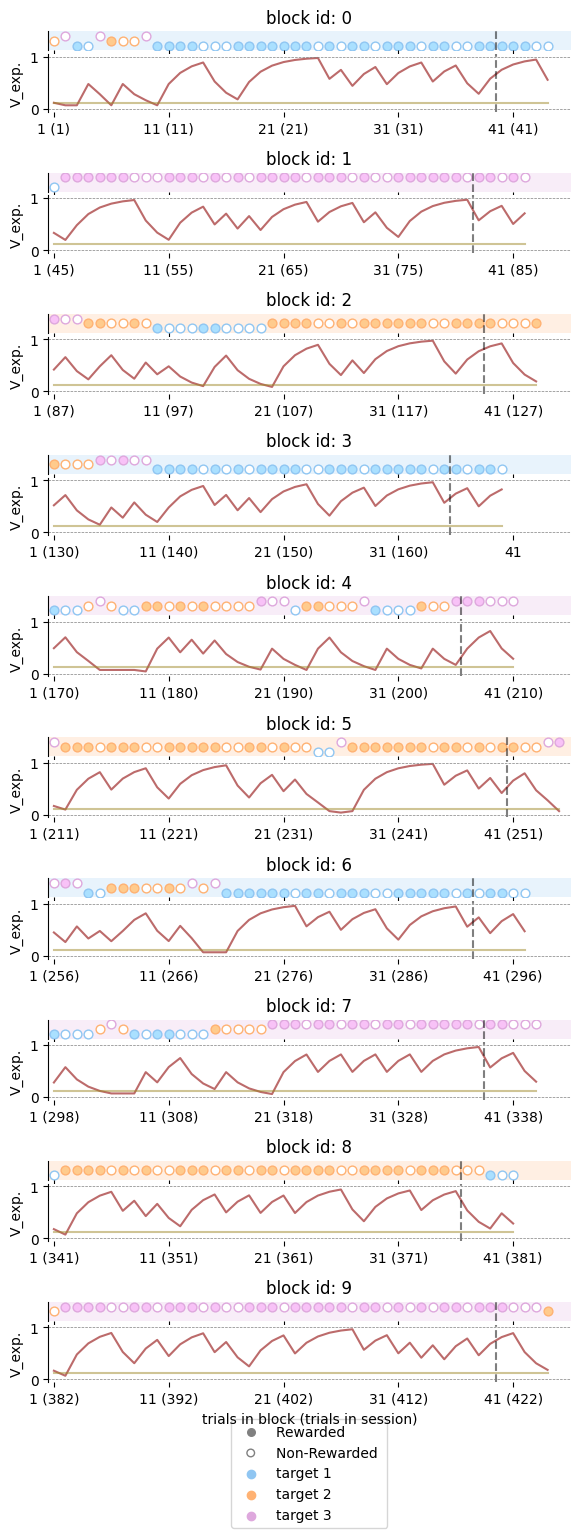

In [5]:
# Foraging value-based target selection plot
show_target_selection_compact(behav, 
                              format='False',
                              background_values=['stay_value', 'V0'],   # here we tell what variable to use as background - value in this case
                              ylabel='V_exp.')

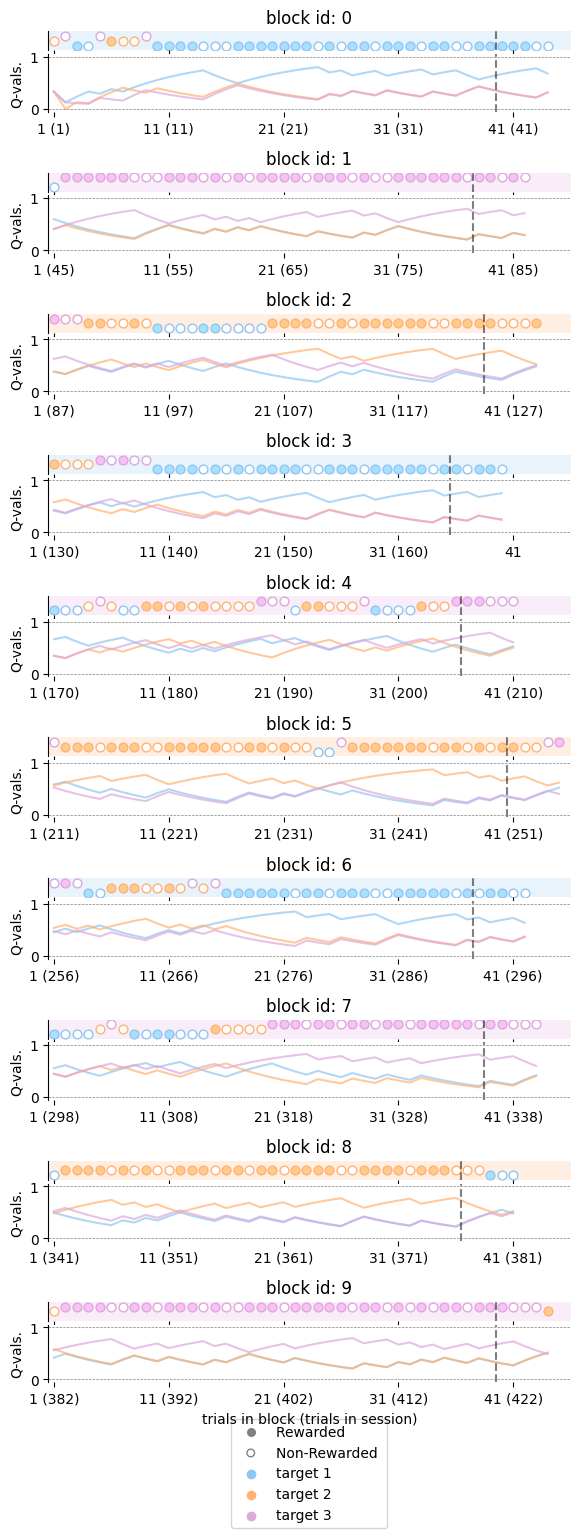

In [6]:
# RL value-based target selection plot
show_target_selection_compact(behav, 
                              format='False',
                              background_values=['Q_1', 'Q_2', 'Q_3'],   # here we tell what variable to use as background - value in this case
                              ylabel='Q-vals.')